In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from IPython.display import display, Math

### Part 1

Exercise 1 using numpy

$$f(x) =\begin{cases} \sin(x\pi) & if & x < 0\\ 1.5 & if & x = 0 \\ -(x-2)^2 & if &  x > 0 \end{cases}  $$

$$ D: -1 \leq x \leq 2$$

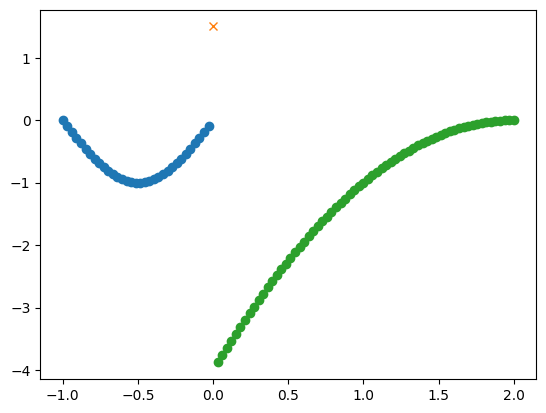

In [27]:
x_domain = np.linspace(-1, 2, 100)

def f(x):
    if x < 0:
        return np.sin(x*np.pi)
    elif x == 0:
        return 1.5
    elif x > 0:
        return -(x-2)**2
# plt.plot(x_domain,[f(x) for x in x_domain])
def f(x):
    y1 = np.sin(x[x < 0]*np.pi)
    y2 = 1.5
    y3 = -(x[x > 0]-2)**2

    return (x[x < 0],y1),(x[x == 0],y2),(y3,x[x > 0])

y1,y2,y3 = f(x_domain)
plt.plot(y1[0],y1[1],'o')
plt.plot(y2[0],y2[1],'x')
plt.plot(y3[1],y3[0],'o')
# plt.xlim(-.1,.1)

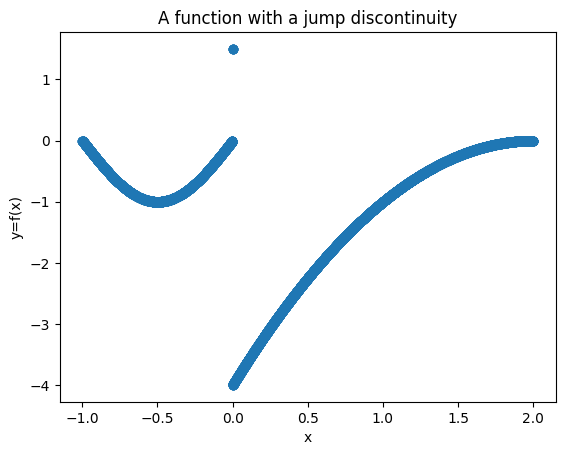

Limit approaches -0.006283143965558952 from the left.
Limit approaches -3.992004 from the right.
Function value at x=0:  1.5.


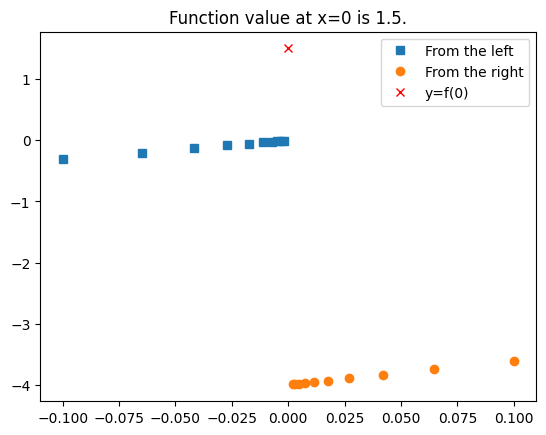

In [30]:
# piecewise function

def fx(x):
  x = np.array(x)
  y = np.zeros(x.shape)

  tol = 10e-4
  y[x<-tol] = np.sin(x[x<-tol]*np.pi)
  y[x>tol] = -(x[x>tol]-2)**2
  y[np.abs(x)<tol] = 1.5
  return y


xx = np.linspace(-1,2,10001)
plt.plot(xx,fx(xx),'o')
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.title('A function with a jump discontinuity')
plt.show()

# limit as x approaches 0 from the left

# x-axis coordinates getting closer to 0
xFromLeft  = -np.logspace(np.log10(.1),np.log10(.002),10)
xFromRight =  np.logspace(np.log10(.002),np.log10(.1),10)

# function values
limitFromLeft  = fx(xFromLeft)
limitFromRight = fx(xFromRight)

print(f'Limit approaches {limitFromLeft[-1]} from the left.')
print(f'Limit approaches {limitFromRight[0]} from the right.')
print(f'Function value at x=0:  {fx(0)}.')


# plot
plt.plot(xFromLeft,limitFromLeft,'s',label='From the left')
plt.plot(xFromRight,limitFromRight,'o',label='From the right')
plt.plot(0,fx(0),'rx',label='y=f(0)')
plt.legend()
plt.title(f'Function value at x=0 is {fx(0)}.')
plt.show()

### Part 2

Exercise 2 using sympy

$$f(x) =\begin{cases} \sin(x\pi) & if & x < 0\\ 1.5 & if & x = 0 \\ -(x-2)^2 & if &  x > 0 \end{cases}  $$

$$ D: -1 \leq x \leq 2$$

<IPython.core.display.Math object>

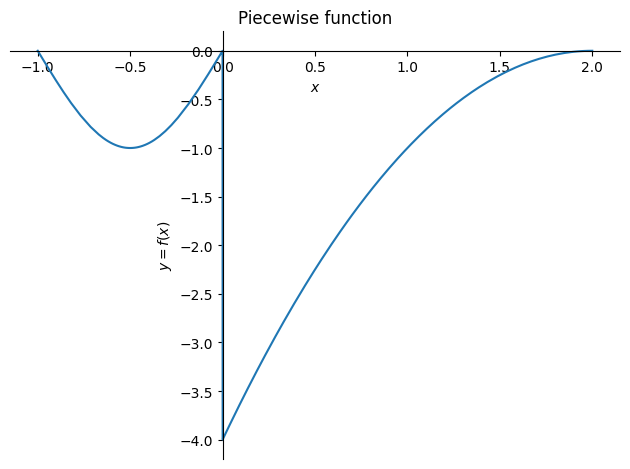

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
x = sp.symbols('x')

fx = sp.Piecewise((sp.sin(x*sp.pi), x < 0), (1.5, sp.Eq(x,0) ), (-(x-2)**2, x > 0))
display(Math('f(x) = '+ sp.latex(fx)))
sp.plot(fx, (x, -1, 2), ylabel="$y = f(x)$", xlabel="$x$", title="Piecewise function", show=True)

# find the limits

# find the limit of the function as x approaches 0 from the left
limitAt0Left = sp.limit(fx,x,-10e3,'-')
display(Math(f'\\lim_{{x \\to 0^-}} f(x) = {limitAt0Left}'))

# find the limit of the function as x approaches 0 from the right
limitAt0Right = sp.limit(fx,x,10e3,'+')
display(Math(f'\\lim_{{x \\to 0^+}} f(x) = {limitAt0Right}'))


In [47]:
# test limits
print('Limit as x approaches 0 from the left:')
print( sp.N(sp.limit(fx,x,0,dir='-')) )

print('\nLimit as x approaches 0 from the right:')
print( sp.limit(fx,x,0,dir='+') )

print('\nTwo-sided limit as x approaches 0:')
print( sp.limit(fx,x,0,dir='+-') )

print('\n\nFunction value at limit:')
print( sp.N(sp.limit(fx,x,0)) )

Limit as x approaches 0 from the left:
1.50000000000000

Limit as x approaches 0 from the right:
3/2

Two-sided limit as x approaches 0:
3/2


Function value at limit:
1.50000000000000


mike

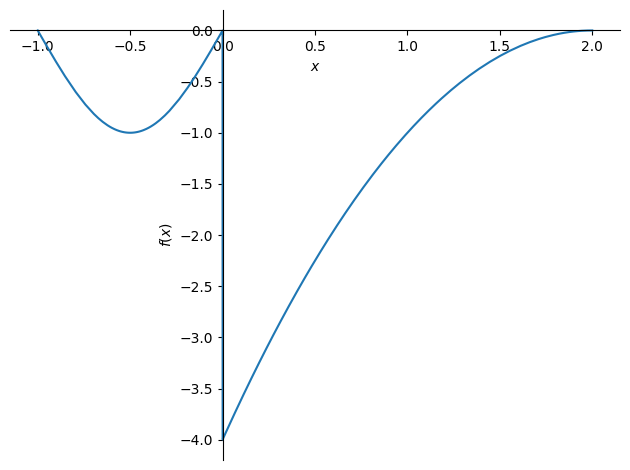

Piecewise((sin(pi*x), x < 0), (1.5, Eq(x, 0)), (-(x - 2)**2, x > 0))

In [41]:
x = sp.symbols('x')


# list function pieces
piece1 = sp.sin(x*sp.pi)
piece2 = 1.5
piece3 = -(x-2)**2

# put them together with conditions
fx = sp.Piecewise( 
      (piece1,x<0),
      (piece2,sp.Eq(x,0)),
      (piece3,x>0) 
      )


# plot
sp.plot(fx,(x,xx[0],xx[-1]))
plt.show()
fx

In [45]:
# test limits
print('Limit as x approaches 0 from the left:')
print( sp.N(sp.limit(fx,x,0,dir='-')) )

print('\nLimit as x approaches 0 from the right:')
print( sp.limit(fx,x,0,dir='+') )

print('\nTwo-sided limit as x approaches 0:')
print( sp.limit(fx,x,0,dir='+-') )

print('\n\nFunction value at limit:')
print( sp.N(sp.limit(fx,x,0)) )

Limit as x approaches 0 from the left:
1.50000000000000

Limit as x approaches 0 from the right:
3/2

Two-sided limit as x approaches 0:
3/2


Function value at limit:
1.50000000000000


Exercise 3 - infinite discontinuity in sympy

$$ f(x) = \frac{3}{1-x^2}$$ 

<IPython.core.display.Math object>

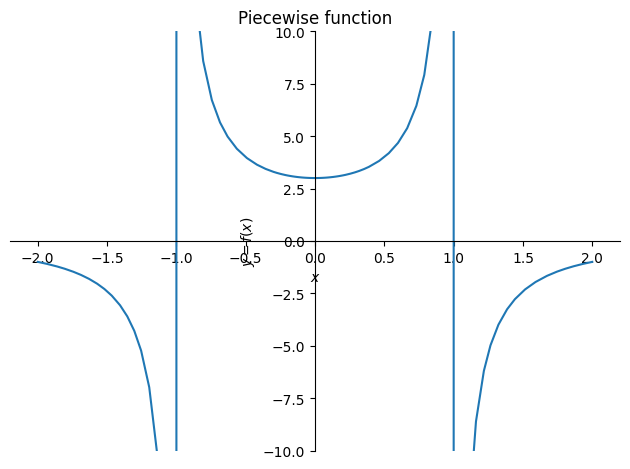

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [56]:
x = sp.symbols('x')

fx = 3/(1-x**2)
display(Math('f(x) = '+ sp.latex(fx)))
sp.plot(fx, (x, -2, 2), ylabel="$y = f(x)$", xlabel="$x$", title="Piecewise function", show=True, ylim=(-10,10))

# find the limits

# find the limit of the function as x approaches 0 from the left
limitAt0Left = sp.limit(fx,x,-1,'-')
display(Math(f'\\lim_{{x \\to -1^-}} f(x) = {limitAt0Left}'))

# find the limit of the function as x approaches 0 from the right
limitAt0Right = sp.limit(fx,x,-1,'+')
display(Math(f'\\lim_{{x \\to -1^+}} f(x) = {limitAt0Right}'))


Exercise 4 - oscillating discontinuity

<IPython.core.display.Math object>

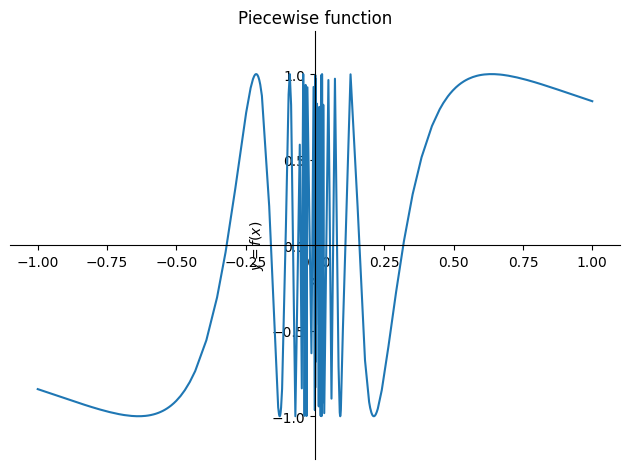

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [61]:
x = sp.symbols('x')

fx = sp.sin(x**-1)
display(Math('f(x) = '+ sp.latex(fx)))
sp.plot(fx, (x, -1, 1), ylabel="$y = f(x)$", xlabel="$x$", title="Piecewise function", show=True, ylim=(-1.25,1.25))

# find the limits

# find the limit of the function as x approaches 0 from the left
limitAt0Left = sp.limit(fx,x,0,'-')
display(Math(f'\\lim_{{x \\to 0^-}} f(x) = {limitAt0Left}'))

# find the limit of the function as x approaches 0 from the right
limitAt0Right = sp.limit(fx,x,0,'+')
display(Math(f'\\lim_{{x \\to 0^+}} f(x) = {limitAt0Right}'))
